**Table of Contents** <br>
* [1. Import](#import)
    * [1.1. Import Libraries](#importlibraries)
    * [1.2. Created Functions](#createdfunctions)
    * [1.3. Import Datasets](#importdatasets)
* [2. Data Exploration](#dataexploration)
    * [2.1. Data Content and decriptive analysis](#dataanalysis)
    * [2.2. Checking incoherencies in the data](#incoherencies)
       * [2.2.1 Changing the data types](#types)
       * [2.2.2 Checking Duplicates](#duplicates)
       * [2.2.3 Checking Unique Values & looking for some values that can indicate missing values](#unique)
* [3. Data Visualisation](#visualisation)
   * [3.1. Define Metric and Non-Metric Features](#metricandnon)
     * [3.1.1 Metric Features](#metric)
     * [3.1.2 Non-Metric Features](#non)
* [4. Data Cleaning and Pre-Processing](#clean)
   * [4.1. Checking for missing values in the target variable  - Claim Injury Type](#nantarget)
   * [4.2. Checking for missing values in the independent variables](#nanindependent)
   * [4.3. Dealing with Missing Values](#dealnan)
* [5. Multivariate Analysis](#multi)
* [6. Outliers](#outliers)
  * [6.1. Visualisation of Outliers](#viewoutliers)
  * [6.2. Outlier Removal](#removeoutliers)
    * [6.2.1 Manual Outlier Removal](#manual)
* [7. Feature Engineering](#feateng)
* [8. Data Transformation](#transform)
  * [8.1. Feature Encoding](#encode)
  * [8.2. Min-max Scaler](#minmax)
  * [8.3 Standard Scaler](#std) 
* [9. Feature Selection](#featselect)
  * [9.1. Filter Methods](#filter)
    * [9.1.1 Univariate Variables](#uni)
    * [9.1.2 Chi-Square](#chi)
  * [9.2 Wrapper Methods](#wrapper)
    * [9.2.1 RFE](#rfe)
  * [9.3 Embedded Methods](#embedded)
    * [9.3.1 Lasso Regression](#lasso)
  * [9.4 Select K Best Method](#select)
  * [9.5 Drop Features According to Feature Selections](#dropfeat)
* [10. Model](#model)
* [11. Kaggle Submission](#kaggle)   
         



<hr>
<a class="anchor" id="import">
    
# 1. Import 
    

</a> 

<a class="anchor" id="importlibraries">

### 1.1. Import Libraries

</a>

In [ ]:
## Import standard data processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Import datetime object for date columns in dataset
from datetime import datetime

## Setting seaborn style
sns.set()

from math import ceil

## Import train_test_split to split data for model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Import Libraries for Feature Selection
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_regression

## Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV

# Import Cross Validation methods
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None) #Show all columns


## Supress warnings
import warnings
warnings.filterwarnings('ignore')


<a class="anchor" id="CreatedFunctions">

### 1.2. Created Functions

</a>

---

<a class="anchor" id="importdatasets">

### 1.3. Import Datasets

</a>

In [ ]:
train_data = pd.read_csv("train_data.csv", low_memory=False)
test_data = pd.read_csv("test_data.csv")

<hr>
<a class="anchor" id="Dataexploration">
    
# 2. Data Exploration
    
</a>

<a class="anchor" id="dataanalysis">

### 2.1. Data content and descriptive analysis

</a>

In [ ]:
train_data.head()


In [ ]:
test_data.head()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

Train data has 3 more variables than test data. Below we check which columns containt train that test does not have.

In [ ]:
test_data.columns.values

In [ ]:
train_data.columns.values

In the Test there is not variables: Claim Injury Type (reasonable becuase it is target variable), Agreement Reached and WCB Decision. Maybe it is the information that is known after defininig the target variable

In [ ]:
# set "Claim Identifier" as the index for the train and test datasets
train_data = train_data.set_index("Claim Identifier")
test_data = test_data.set_index("Claim Identifier")

In [ ]:
train_data.describe(include="all").T

---

<a class="anchor" id="incoherencies">

### 2.2. Checking incoherencies in the data. 

</a> 

In [ ]:
train_data.info()

## DATA TYPES:
# Convert accident date (to date type)
# convert age (to int)
# Alternative dispute resolution (??)
# Assembly date (to date type)
# birth year (to int)
# C2 date (to date type)
# C3 date (to date type)
# First hearing date (to date)
# IME-4 count (to int)
# Industry code (object)
# OIICS Nature of Injury Description (to object) - all nulls (relevant??)
# WCIO cause of injury code (float to object)
# WCIO Nature of Injury Code (float to object)
# WCIO Part Of Body Code (float to object)
# Agreement reached (??) - boolean/ int(???)
# Number of dependents (to int)

In [ ]:
test_data.info()

<a class="anchor" id="types">

#### 2.2.1 Changing the data types

</a> 

In [ ]:
train_data["Age at Injury"] = train_data["Age at Injury"].astype("Int64")
test_data["Age at Injury"] = test_data["Age at Injury"].astype("Int64")

train_data["Number of Dependents"] = train_data["Number of Dependents"].astype("Int64")
test_data["Number of Dependents"] = test_data["Number of Dependents"].astype("Int64")

train_data["Birth Year"] = train_data["Birth Year"].astype("Int64")
test_data["Birth Year"] = test_data["Birth Year"].astype("Int64")

train_data["WCIO Part Of Body Code"] = train_data["WCIO Part Of Body Code"].astype("Int64")
test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].astype("Int64")

train_data["WCIO Nature of Injury Code"] = train_data["WCIO Nature of Injury Code"].astype("Int64")
test_data["WCIO Nature of Injury Code"] = test_data["WCIO Nature of Injury Code"].astype("Int64")

train_data["WCIO Cause of Injury Code"] = train_data["WCIO Cause of Injury Code"].astype("Int64")
test_data["WCIO Cause of Injury Code"] = test_data["WCIO Cause of Injury Code"].astype("Int64")

train_data["Industry Code"] = train_data["Industry Code"].astype("Int64")
test_data["Industry Code"] = test_data["Industry Code"].astype("Int64")

train_data["Agreement Reached"] = train_data["Agreement Reached"].astype("Int64")

train_data["Accident Date"] = pd.to_datetime(train_data['Accident Date'])
test_data["Accident Date"] = pd.to_datetime(test_data['Accident Date'])

train_data["Assembly Date"] = pd.to_datetime(train_data['Assembly Date'])
test_data["Assembly Date"] = pd.to_datetime(test_data['Assembly Date'])

train_data["C-2 Date"] = pd.to_datetime(train_data['C-2 Date'])
test_data["C-2 Date"] = pd.to_datetime(test_data['C-2 Date'])

train_data["C-3 Date"] = pd.to_datetime(train_data['C-3 Date'])
test_data["C-3 Date"] = pd.to_datetime(test_data['C-3 Date'])

train_data["First Hearing Date"] = pd.to_datetime(train_data['First Hearing Date'])
test_data["First Hearing Date"] = pd.to_datetime(test_data['First Hearing Date'])




#train_data["Accident Date"] = pd.to_datetime(train_data['Accident Date']).dt.strftime('%Y-%m-%d')
#test_data["Accident Date"] = pd.to_datetime(test_data['Accident Date']).dt.strftime('%Y-%m-%d')

#train_data["Assembly Date"] = pd.to_datetime(train_data['Assembly Date']).dt.strftime('%Y-%m-%d')
#test_data["Assembly Date"] = pd.to_datetime(test_data['Assembly Date']).dt.strftime('%Y-%m-%d')

#train_data["C-2 Date"] = pd.to_datetime(train_data['C-2 Date']).dt.strftime('%Y-%m-%d')
#test_data["C-2 Date"] = pd.to_datetime(test_data['C-2 Date']).dt.strftime('%Y-%m-%d')

#train_data["C-3 Date"] = pd.to_datetime(train_data['C-3 Date']).dt.strftime('%Y-%m-%d')
#test_data["C-3 Date"] = pd.to_datetime(test_data['C-3 Date']).dt.strftime('%Y-%m-%d')

#train_data["First Hearing Date"] = pd.to_datetime(train_data['First Hearing Date']).dt.strftime('%Y-%m-%d')
#test_data["First Hearing Date"] = pd.to_datetime(test_data['First Hearing Date']).dt.strftime('%Y-%m-%d')


<a class="anchor" id="duplicates">

#### 2.2.2 Checking Duplicates

</a> 

In [ ]:
duplicates_sum_train = train_data.duplicated().sum()
duplicates_sum_test = test_data.duplicated().sum()

print(f"There are {duplicates_sum_train} in the training dataset.")
print(f"There are {duplicates_sum_test} in the test dataset.")

We do not drop duplicates in the test dataset. We only do that in the train dataset.

In [ ]:
train_data.drop_duplicates(inplace=True)

<a class="anchor" id="unique">

#### 2.2.3 Checking unique values & looking for some values that can indicate missing values

</a> 

In [ ]:
for column in train_data.columns:
    unique_values = train_data[column].unique()
    unique_values_num = train_data[column].nunique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print(f"Number of unique values in '{column}':")
    print(unique_values_num)
    
    print()

Cells below are commented because they were used to check more detailed unique values for chosen variables

In [ ]:
# train_data['Accident Date'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['Age at Injury'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['Assembly Date'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['Average Weekly Wage'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['Birth Year'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['C-2 Date'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['C-3 Date'].value_counts().sort_index(ascending=False)

In [ ]:
# train_data['Carrier Name'].value_counts().sort_index()

In the variable Carrier Type there is one category 5A, 5C and 5D that can be change to one 5 that will be Special Fund

In [ ]:
# train_data['Carrier Type'].value_counts().sort_index()

In [ ]:
# train_data['First Hearing Date'].value_counts().sort_index()

In [ ]:
# train_data['Zip Code'].value_counts().sort_index()

#### All listed Variables - unique variables summary 

1. **Accident Date**: contains dates, no strange values (5539 unique values)

2. **Age at Injury**: there are some values >100 and there is age equal to  0  (108 unique values) 
3. **Alternative Dispute Resolution**: there is one strange unique value such as "U" (3 unique values)
4. **Assembly Date**: containts dates, no strange values (1096 unique values)
5. **Attorney/Representative**: no strange values (2 unique values)
6. **Average Weekly Wage**: no typical strange values but there are many records sayin that avg weekly wage is equal to 0, a lot of unique values (120024 unique values)
7. **Birth Year**:  one strange values "0" (Birth Year cannot be 0) (107 unique values)
8. **C-2 Date**: contains data, there are some years from 90s (2475 unique values)
9. **C-3 Date**: contains data, there are some years from 90s (1648 unique values)
10. **Carrier Name**: there are some strange description such as: '*** CARRIER UNDETERMINED ***', (2046 unique values) 
11. **Carrier Type**: there is one strange value 'UNKNOWN' (8 unique values)
12. **Claim Injury Type**: no strange values (8 unique values)
13. **County of Injury**: there is one strange value 'UNKNOWN' (63 unique values)
14. **COVID-19 Indicator**: no strange values (2 unique values)
15. **District Name**: no strange values (8 unique values)
16. **First Hearing Date**: no strange values (1094 unique values)
17. **Gender**: two strange values 'U' 'X' (4 unique values)
18. **Industry Code**: no strange values (24 unique values)
19. **Industry Code Description**: no strange values (20 unique values)
20. **Medical Fee Region**: one strange value 'UK' (4 unique values)
21. ***OIICS Nature of Injury Description**: variable does not contain any data
22. **WCIO Cause of Injury Code**: no strange values (77 unique values) 
23. **WCIO Cause of Injury Description**: no strange values (74 unique values)
24. **WCIO Nature of Injury Code**: and no strange values (56 unique values)
25. **WCIO Nature of Injury Description**: no strange values (56 unique values)
26. **WCIO Part Of Body Code**: one strange values "-9" (57 unique values)
27. **WCIO Part Of Body Description**: no strange values (54 unique values)
28. **Zip Code**:  this variables is a bit strange, it has some strange zip codes such as zip code '.1605', '00000' or '99999' that does not exist, also it has zip codes that starts with letters not with numbers as well as one unique value 'UNKNO' (8286 unique values)
29. **Agreement Reached**:  no strange values (2 unique values)
30. **WCB Decision**: no strange values (1 unique value)
31. **Number of Dependents**: no strange values (7 unique values)


Based on the description above we changed strange values to missing values.

In [ ]:
# Filling missing values with NaN

train_data['Alternative Dispute Resolution'].replace('U', np.nan, inplace = True)
test_data['Alternative Dispute Resolution'].replace('U', np.nan, inplace = True)

train_data['Carrier Name'].replace('*** CARRIER UNDETERMINED ***', np.nan, inplace = True)
test_data['Carrier Name'].replace('*** CARRIER UNDETERMINED ***', np.nan, inplace = True)

train_data['Carrier Type'].replace('UNKNOWN', np.nan, inplace = True)
test_data['Carrier Type'].replace('UNKNOWN', np.nan, inplace = True)

train_data['County of Injury'].replace('UNKNOWN', np.nan, inplace=True)
test_data['County of Injury'].replace('UNKNOWN', np.nan, inplace=True)

train_data['Gender'].replace(['X','U'], np.nan, inplace = True)
test_data['Gender'].replace(['X','U'], np.nan, inplace = True)

train_data['Medical Fee Region'].replace('UK', np.nan, inplace = True)
test_data['Medical Fee Region'].replace('UK', np.nan, inplace = True)

train_data['Zip Code'].replace([".1605", "00000", "99999","UNKNO"], np.nan, inplace=True)
test_data['Zip Code'].replace([".1605", "00000", "99999", "UNKNO"], np.nan, inplace=True)

Investigating 0 values in the Age variable

In [ ]:
train_data[train_data['Age at Injury'] == 0].shape

In [ ]:
age_at_injury_zero = train_data[train_data['Age at Injury'] == 0]
age_at_injury_zero.groupby('Birth Year')['Age at Injury'].value_counts(dropna=False).sort_index()

- There are 5463 zeros in total in the variables Age at Injury
- There are 1926 values that are 0 both in Birth Year as well as at Age at Injury
- The rest of the zero values (3537) in the variable Age at Injury can be replaced with actual age calulated as accident date - birth year 

Replacing the Age at Injury values that are equal to 0 (where Birth Year is not equal to 0) with the actual age calculated from the difference between the Accident Date and the Birth Year

In [ ]:
train_data['Actual Age'] = train_data['Accident Date'].dt.year - train_data['Birth Year']

filtered_rows = train_data[(train_data['Birth Year'] != 0) & (train_data['Age at Injury'] == 0)]

train_data.loc[filtered_rows.index, 'Age at Injury'] = train_data['Actual Age']

In [ ]:
test_data['Actual Age'] = test_data['Accident Date'].dt.year - test_data['Birth Year']

filtered_rows = test_data[(test_data['Birth Year'] != 0) & (test_data['Age at Injury'] == 0)]

test_data.loc[filtered_rows.index, 'Age at Injury'] = test_data['Actual Age']

Check if there are any incoherencies in between Age at Injury that is given in the data set and Actual Age calulated as difference between Accident Date and Birth Year

In [ ]:
train_data['Age Diff'] = train_data['Actual Age'] - train_data['Age at Injury']

age_difference = train_data[['Accident Date', 'Birth Year','Actual Age', 'Age at Injury', 'Age Diff']]

filtered_summary = age_difference[(age_difference['Age Diff'] != 0) &  (age_difference['Birth Year'] != 0) & (age_difference['Birth Year'].notna())]

filtered_summary['Age Diff'].value_counts()


In [ ]:
test_data['Age Diff'] = test_data['Actual Age'] - test_data['Age at Injury']

age_difference = test_data[['Accident Date', 'Birth Year','Actual Age', 'Age at Injury', 'Age Diff']]

filtered_summary = age_difference[(age_difference['Age Diff'] != 0) &  (age_difference['Birth Year'] != 0) & (age_difference['Birth Year'].notna())]

filtered_summary['Age Diff'].value_counts()


Conclusion:

There are no incoherencies in between those two variables. the only unique values are 1 and -1 and that difference can be caused by the fact that we dont have the Birth Month, so Actual Age can be slightly inaccurate.

In [ ]:
train_data.drop(columns=['Actual Age','Age Diff'], inplace=True)
test_data.drop(columns=['Actual Age', 'Age Diff'], inplace=True)

In [ ]:
train_data['Age at Injury'].value_counts().sort_index()

In [ ]:
train_data[(train_data['Age at Injury'] == 0)].shape

In [ ]:
# train_data.groupby('Age at Injury')['Birth Year'].value_counts(dropna=False).sort_index()

Changing Age at Injury from 0 to missing values where the Birth Year has missing value.

In [ ]:
train_data.loc[(train_data['Age at Injury'] == 0) & (train_data['Birth Year'].isna()), 'Age at Injury'] = np.nan
test_data.loc[(test_data['Age at Injury'] == 0) & (test_data['Birth Year'].isna()), 'Age at Injury'] = np.nan


Changing Age at Injury from 0 to missing values where the Birth Year is also 0

In [ ]:
train_data.loc[(train_data['Age at Injury'] == 0) & (train_data['Birth Year'] == 0), 'Age at Injury'] = np.nan
test_data.loc[(test_data['Age at Injury'] == 0) & (test_data['Birth Year'] == 0), 'Age at Injury'] = np.nan

In [ ]:
train_data['Age at Injury'].value_counts(dropna=False).sort_index()

At this point Birth Year variable can be dropped since it has similar info as Age at Injury 

In [ ]:
train_data = train_data.drop('Birth Year', axis=1)
test_data = test_data.drop('Birth Year', axis=1)

Recheck for unique values in those variables that have been changed

In [ ]:
# train_data['Alternative Dispute Resolution'].value_counts().sort_index()

In [ ]:
# train_data['Carrier Name'].value_counts().sort_index()

In [ ]:
# train_data['Carrier Type'].value_counts().sort_index()

In [ ]:
# train_data['County of Injury'].value_counts().sort_index()

In [ ]:
# train_data['Gender'].value_counts().sort_index()

In [ ]:
# train_data['Medical Fee Region'].value_counts().sort_index()

In [ ]:
# train_data['Zip Code'].value_counts().sort_index()

There is also strange value in the variable WCIO Part Of Body Code. According WCIO website there is no such code as -9. We checked with variable WCIO Part of Body Description which description corresponds to Code -9 in our data set. We found out that -9 is always associated with description "Multiple".

In [ ]:
# Display only rows where "WCIO Part Of Body Code" in train dataset equals -9
filtered_data_train = train_data[train_data["WCIO Part Of Body Code"] == -9]

filtered_data_train["WCIO Part Of Body Description"].value_counts()

In [ ]:
# Display only rows where "WCIO Part Of Body Code" in test dataset equals -9
filtered_data_test = test_data[test_data["WCIO Part Of Body Code"] == -9]

filtered_data_test["WCIO Part Of Body Description"].value_counts()

We gonna deal with that "-9" values after splitting into validation and training set (in the filling missing values section)

Variable ***Zip Code*** has a lot of unique values. Therefore, we decided to group Zip Code 

In [ ]:
# Creating new variable zip_code dividied into categories 
def categorize_zip(zip_code):
    if pd.isna(zip_code):  
        return np.nan 
    elif isinstance(zip_code, str) and zip_code[0].isdigit():
        return zip_code[0]
    else:
        return "Other"

train_data['zip_code_cat'] = train_data['Zip Code'].apply(categorize_zip)
test_data['zip_code_cat'] = test_data['Zip Code'].apply(categorize_zip)

print(train_data['zip_code_cat'].value_counts(dropna=False))


Dropping the variable Zip Code

In [ ]:
train_data = train_data.drop('Zip Code', axis =1)
test_data = test_data.drop('Zip Code', axis =1)

We decided to drop variables such us: OIICS Nature of Injury Description and WCB Decision. First variables does not containt any values and second contain only one uniqeu value, so both of them are not informative. We drop WCB Decision only from the train_data because it is not included in the test_data

In [ ]:
train_data =train_data.drop(['OIICS Nature of Injury Description','WCB Decision','Agreement Reached'], axis=1)
test_data = test_data.drop(['OIICS Nature of Injury Description'],axis=1)

Based on the description of unique values we can assume that variables such as 'WCIO Part Of Body Description','WCIO Nature of Injury Description','WCIO Cause of Injury Description', 'Carrier Name' could be considered to being dropped, becuase they containts description of coded variables, so we do not need to duplicate the information.

---

<a class="anchor" id="visualisation">

## 3. Data Visualisation

</a>

<a class="anchor" id="metricandnon">

### 3.1 Define Metric and Non-Metric Features

</a>

Before doing data visualisation we define metric and non-metric features

In [ ]:
train_data.columns

In [ ]:
### Define metric & non-metric features

metric_features = ["Age at Injury", "Average Weekly Wage", "IME-4 Count", "Number of Dependents"]

non_metric_features = ["Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code", "Accident Date", "Alternative Dispute Resolution",
                       "Assembly Date", "Attorney/Representative", "C-2 Date", "C-3 Date", "Carrier Name", "Carrier Type", "County of Injury", "COVID-19 Indicator",
                       "District Name", "First Hearing Date", "Gender", "Industry Code Description", "Medical Fee Region", "WCIO Cause of Injury Description", 
                       "WCIO Nature of Injury Description", "WCIO Part Of Body Description","zip_code_cat"]



# metric_features = ["Age at Injury", "Average Weekly Wage", "Birth Year", "IME-4 Count", "Number of Dependents"]

# non_metric_features = ["Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code", "Accident Date", "Alternative Dispute Resolution",
#                        "Assembly Date", "Attorney/Representative", "C-2 Date", "C-3 Date", "Carrier Name", "Carrier Type", "County of Injury", "COVID-19 Indicator",
#                        "District Name", "First Hearing Date", "Gender", "Industry Code Description", "Medical Fee Region", "WCIO Cause of Injury Description", 
#                        "WCIO Nature of Injury Description", "WCIO Part Of Body Description", "Zip Code", "Agreement Reached"]


<a class="anchor" id="metric">

#### 3.1.1 Metric Features

</a>

In [ ]:
train_data['Age at Injury'].plot(
    kind='hist',
    color='bisque', 
    edgecolor='black',
    bins=19
)

plt.title('Histogram of Age at Injury')
plt.xlabel('Age at Injury')
plt.ylabel('Frequency') 
plt.show()

Analysis:
- The data is primarily concentrated between ages 20 and 70, with minimal occurrences beyond age 80. 
- The age group with the highest frequency of injuries appears to be in the range of 40 to 50, followed closely by the 30-40 and 50-60 ranges.
- The histogram is roughly symmetric and bell-shaped, suggesting a somewhat normal distribution centered around middle-aged individuals (30-60).
- There are some cases of injuries at extreme ages (under 10 and over 80), though these are rare compared to the central age groups.


In [ ]:
train_data['Average Weekly Wage'].plot(
    kind='hist',
    color='bisque',
    edgecolor='black',
    bins=19
)

plt.title('Histogram of Average Weekly Wage')
plt.xlabel('Average Weekly Wage')
plt.ylabel('Log10(Frequency)')
plt.yscale('log')  
plt.show()   

Analysis:
- Most data points are concentrated at the very low end of the wage scale, with a large spike around the minimum wage range. This suggests that the majority of individuals earn a relatively low weekly wage.
- The y-axis is in a logarithmic scale, indicating that the actual frequencies vary greatly. This scale allows us to see the distribution more clearly, even though most values are concentrated at the low end.
- As wages increase, the frequency decreases rapidly. There are only a few occurrences of higher wages, suggesting that high average weekly wages are rare.
- There are small bars at the far right end of the scale (near 2.5 million), which could indicate a few extreme outliers or high-income earners in the dataset.

In [ ]:
train_data['IME-4 Count'].plot(
    kind='hist',
    color='bisque', 
    edgecolor='black',
    bins=19
)

plt.title('Histogram of IME-4 Count')
plt.xlabel('IME-4 Count')
plt.ylabel('Log10(Frequency)')
plt.yscale('log')  
plt.show()   

Analysis:
- The data is heavily skewed towards lower values of IME-4 Count, with the highest frequency occurring between 0 and 10. 
- The y-axis is in a logarithmic scale, indicating that the actual frequencies vary greatly. This scale allows us to see the distribution more clearly, even though most values are concentrated at the low end.
- The frequency decreases as the IME-4 Count increases. There is a gradual decline from low to high values, with only a few occurrences beyond 50.
- There is a small bar at the far right (around 70), suggesting a few outliers with unusually high IME-4 Counts.

In [ ]:
train_data['Number of Dependents'].plot(
    kind='hist',
    color='bisque', 
    edgecolor='black',
    bins=5
)

plt.title('Histogram of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency') 
plt.show()

Analysis:
- The x-axis represents the number of dependents (ranging from 0 to 6).
- The highest frequencies are at 0 and 6 dependents.
- There is a noticeable dip in frequency for categories 2, 3, and 4 dependents, indicating fewer instances.

In [ ]:
# train_data['Birth Year'].plot(
#     kind='hist',
#     color='bisque', 
#     edgecolor='black',
#     bins=19
# )

# plt.title('Histogram of Birth Year')
# plt.xlabel('Birth Year')
# plt.ylabel('Frequency') 
# plt.show()

- Birth Year = 0
- Define a funtion to be able to see the values within a range

In [ ]:
def plot_filtered_histogram(data, column_name, min_value, max_value, bins=19):
    
    # Filter the data to include only the values in the specified range
    filtered_data = train_data[(train_data[column_name] >= min_value) & (train_data[column_name] <= max_value)][column_name].dropna()
    
    #Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_data, bins=bins, color='bisque', edgecolor='black')
    plt.title(f'Histogram of {column_name} (range: {min_value} to {max_value})')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [ ]:
# plot_filtered_histogram(train_data, column_name="Birth Year", min_value=1920, max_value=2024, bins=19)

<a class="anchor" id="non">

#### 3.1.2 Non-Metric Features

</a>

In [ ]:
for column in non_metric_features:
    
    top_categories = train_data[column].value_counts().head(10)

    top_categories_sorted = top_categories.sort_values(ascending=True)

    data_filtered = train_data[train_data[column].isin(top_categories_sorted.index)]
    
   
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data_filtered, 
                  x=column, 
                  order=top_categories_sorted.index,  
                  palette='tab20b')
    
  
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Top 10 Categories in {column}')
    
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Analysis: Categorical Variables
 - Industry Code

 The top 2 industry codes are **62** (almost 120.000) and **92** (almost 100.000) with a large marge relatively to the rest


 - WCIO Cause of Injury Code

 The most common cause of injury has the code **56** (almost 50.000) with a marge relatively to the others


 - WCIO Nature of Injury Code 

 The top 2 industry codes are **52** (close to 160.000) and **10** (closte to 110.000) with a large marge relatively to the rest


 - WCIO Part of Body Code 

 The most common cause of injury has the code **42** (slightly exceeds 50.000) and **53** (close to 50.000)


 - Accident Date

01-03-2023 (slightly exceeds 1200) with a large marge relatively to the others


- Alternative Dispute Resolution

100% = No


- Assembly Date 

Top 3: 06-03-2020 (1400), 11-05-2021 (close to 1400) and 01-04-2022 (slightly exceeds 1200)


- Attorney/Representative

Almost 400.000 = No


- C-2 Date

11-05-2021 (close to 1875) with a large marge in relation to the others


- C-3 Date

Top 3: 21-04-2021, 26-10-2020 and 10-02-2020 (all 3 close to 350)


- Carrier Name 

State Insurance Fund (more than 100.000) with a large marge in relation to the others


- Carrier Type

1A.Private (almost 300.000) with a large marge in relation to the others


- County of Injury

Top 3: Suffolk (more than 60.000), Queens (almost 60.000) and Kings (slightly exceeds 50.000)


- COVID-19 Indicator

No (Close to 550.000)


- District Name

NYC (slightly exceeds 255.000) with a large marge in relation to the others


- Fisrt Hearing Date

Top 3: 15-04-2022 (close to 500), 20-01-2022 (slightly exceeds 400) and 15-02-2022 (400)


- Gender 

Male with almost 350.000


- Industry Code Description

The more frequent are: Health Care and Social Assistance (almost 120.000) and Public Administration (slightly exceeds 90.000) with a large marge in relation to the others


- Medical Fee Region 

IV (close to 275.000) with a large marge in relation to the others


- WCIO Cause os Injury Description

Top 3: Fellow worker, Patient or Other Person (close to 50.000), Strain or Injury By, NOC (close to 40.000) and Fall, Slip or Trip, NOC (slightly exceeds 30.000)


- WCIO Nature of Injury Description

Strain or Tear (150.000) and Contusion (slightly exceeds 100.000) with a large marge in relation to the others


- WCIO Part of Body Description

Top 3: Lower Back Area (close to 50.000), Knee (close to 50.000) and Multiple (slightly exceeds 40.000)


- Zip Code Categorie

1 (slightly exceeds 500.000) with a large marge in relation to the others

---

<a class="anchor" id="clean">

## 4. Data Cleaning and Pre-processing

</a>

<a class="anchor" id="nantarget">

### 4.1 Checking for missing values in the target variable - Claim Injury Type

</a>

In [ ]:
train_data["Claim Injury Type"].isna().sum()

In [ ]:
missing_data_target = train_data[train_data['Claim Injury Type'].isna()]
missing_data_target.head()

In [ ]:
missing_data_target.info()
# all features with missing values on the target, are also missing, except Assembly Date -> not relevant (decision -> drop rows)

In [ ]:
train_data= train_data.drop(missing_data_target.index)

Re check for missing values in the target variable

In [ ]:
train_data['Claim Injury Type'].isna().sum()

---

<a class="anchor" id="nanindependent">

### 4.2 Checking for missing values in the intependent variables

</a>

##### - Before we check for missing values in the independet variables we split our data into training and validation set

In [ ]:
X = train_data.drop('Claim Injury Type', axis = 1)
y = train_data['Claim Injury Type']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)


##### Checking the number of missing values in each variable in the train and validation set (number and percentage)

In [ ]:
# missing_values_train = X_train.isnull().sum().sort_values(ascending=False)
# print(missing_values_train)

In [ ]:
# missing_values_val = X_val.isnull().sum().sort_values(ascending=False)
# print(missing_values_val)

In [ ]:
missing_percentage_train = ((X_train.isnull().sum() / len(X_train)) * 100).sort_values(ascending=False)
print(missing_percentage_train)

In [ ]:
missing_percentage_val = ((X_val.isnull().sum() / len(X_val)) * 100).sort_values(ascending=False)
print(missing_percentage_val)

In [ ]:
missing_percentage_test = ((test_data.isnull().sum() / len(test_data)) * 100).sort_values(ascending=False)
print(missing_percentage_test)

Variables such as ***IME-4 Count*** , ***First Hearing Date*** and ***C-3 Date*** have more than 60% of missing values. 
<br> We decided to drop  ***IME-4 Count*** and ***C-3 Date*** becuase they have so many missing values that it does not make sense to impute them (not enough information for taking that as sample for the whole population).
<br> We do not drop ***First Hearing Date*** variable, because blank date (missing value) means the claim has not yet had a hearing held. Thus, it is an information that we want to keep.

In [ ]:
columns_to_drop = ['IME-4 Count','C-3 Date']
X_train =X_train.drop(columns_to_drop, axis=1)
X_val =X_val.drop(columns_to_drop, axis=1)
test_data = test_data.drop(columns_to_drop, axis=1)

metric_features.remove('IME-4 Count')
non_metric_features.remove('C-3 Date')

We decided to change vairable First Hearing Date to binary variable, where NaN values are replaced by 0 - it means that claim has not had a hearing held yet and dataes are replaced by 1 which means that hearings has been already held.

In [ ]:
X_train['First Hearing Date Binary'] = X_train['First Hearing Date'].notna().astype(int)
X_val['First Hearing Date Binary'] = X_val['First Hearing Date'].notna().astype(int)
test_data['First Hearing Date Binary'] = test_data['First Hearing Date'].notna().astype(int)

X_train[['First Hearing Date', 'First Hearing Date Binary']].head()


First Hearing Data variable can be droped after creating binary variable.

In [ ]:
X_train =X_train.drop("First Hearing Date", axis=1)
X_val =X_val.drop("First Hearing Date", axis=1)
test_data =test_data.drop("First Hearing Date", axis=1)

In [ ]:
non_metric_features.remove('First Hearing Date')
non_metric_features.append('First Hearing Date Binary')

Checking for all missing values in all WCIO_columns. WCIO_colums are important during decision of defininunf injury type.

In [ ]:
WCIO_columns = [
    'WCIO Part Of Body Code', 
    'WCIO Part Of Body Description', 
    'WCIO Nature of Injury Description', 
    'WCIO Nature of Injury Code', 
    'WCIO Cause of Injury Description', 
    'WCIO Cause of Injury Code'
]

# Display rows where all WCIO columns contain NaN values
WCIO_nan_rows = X_train[X_train[WCIO_columns].isna().all(axis=1)]

count_all_nan_WCIO = X_train[WCIO_columns].isna().all(axis=1).sum()
print("Rows with all NaN values in WCIO columns:", count_all_nan_WCIO)


# Calculate the percentage of these rows in the whole dataset
percentage_all_nan_WCIO = (count_all_nan_WCIO / len(X_train)) * 100

# Display the result
print(f"Percentage of rows with all NaN values in WCIO columns: {percentage_all_nan_WCIO:.2f}%")
WCIO_nan_rows.head()


In [ ]:
WCIO_columns = [
    'WCIO Part Of Body Code', 
    'WCIO Part Of Body Description', 
    'WCIO Nature of Injury Description', 
    'WCIO Nature of Injury Code', 
    'WCIO Cause of Injury Description', 
    'WCIO Cause of Injury Code'
]

# Display rows where all WCIO columns contain NaN values
WCIO_nan_rows = X_val[X_val[WCIO_columns].isna().all(axis=1)]

count_all_nan_WCIO = X_val[WCIO_columns].isna().all(axis=1).sum()
print("Rows with all NaN values in WCIO columns:", count_all_nan_WCIO)


# Calculate the percentage of these rows in the whole dataset
percentage_all_nan_WCIO = (count_all_nan_WCIO / len(X_val)) * 100

# Display the result
print(f"Percentage of rows with all NaN values in WCIO columns: {percentage_all_nan_WCIO:.2f}%")
WCIO_nan_rows.head()


Dropping rows where all WCIO columns contain NaN values.

In [ ]:
#Filter X_train and y_train
X_train_filtered = X_train[~X_train[WCIO_columns].isna().all(axis=1)]
y_train_filtered = y_train[X_train_filtered.index]

# Filter X_val and y_val
X_val_filtered = X_val[~X_val[WCIO_columns].isna().all(axis=1)]
y_val_filtered = y_val[X_val_filtered.index]

# Assign back to X_train, X_val, y_train, and y_val
X_train, y_train = X_train_filtered, y_train_filtered
X_val, y_val = X_val_filtered, y_val_filtered

Checking the missing percentage for the datasets

In [ ]:
missing_percentage_train = ((X_train.isnull().sum() / len(X_train)) * 100).sort_values(ascending=False)
missing_percentage_train = missing_percentage_train[missing_percentage_train > 0]
print(missing_percentage_train)

In [ ]:
missing_percentage_val = ((X_val.isnull().sum() / len(X_val)) * 100).sort_values(ascending=False)
missing_percentage_val = missing_percentage_val[missing_percentage_val > 0]
print(missing_percentage_val)

In [ ]:
missing_percentage_test = ((test_data.isnull().sum() / len(test_data)) * 100).sort_values(ascending=False)
missing_percentage_test = missing_percentage_test[missing_percentage_test > 0]
print(missing_percentage_test)

<a class="anchor" id="dealnan">

### 4.3 Dealing with Missing Values
</a>

Acording to WCIO website codes that contains in the description word multiple are: 10, 20, 30, 40, 50, 90, 91. Thus, we decided to fill -9 those values with mode amonog codes that corresponds to multiple. We used mode to replace -9 becuase WCIO Part of Body Code is a categorical variable.

In [ ]:
# Define the valid codes for "Multiple"
multiple_codes = [10, 20, 30, 40, 50, 90, 91]

# Calculate the mode among the valid multiple codes
mode_value = X_train[X_train["WCIO Part Of Body Code"].isin(multiple_codes)]["WCIO Part Of Body Code"].mode()[0]

# Replace only -9 values with the mode, leaving other NaN values unchanged
X_train["WCIO Part Of Body Code"] = X_train["WCIO Part Of Body Code"].replace(-9, mode_value)

test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].replace(-9, mode_value)

X_val["WCIO Part Of Body Code"] = X_val["WCIO Part Of Body Code"].replace(-9, mode_value)


print(X_train["WCIO Part Of Body Code"].value_counts(dropna=False))

- All missing values in the variable ***Average Weekly Wage*** are replaced by using median (it is a continous variable)

In [ ]:
median_wage = X_train["Average Weekly Wage"].median()
X_train["Average Weekly Wage"].fillna(median_wage, inplace=True)

X_val["Average Weekly Wage"].fillna(median_wage, inplace=True)
test_data["Average Weekly Wage"].fillna(median_wage, inplace=True)


- Replacing missing values in variable Age at Injury with mean (That variable is almost normal distributed)

In [ ]:
mean_age = int(X_train["Age at Injury"].mean())

X_train["Age at Injury"].fillna(mean_age, inplace=True)

X_val["Age at Injury"].fillna(mean_age, inplace=True)

test_data["Age at Injury"].fillna(mean_age, inplace=True)

- Replacing missing values in ***zip_code_cat*** with mode - categorical variable

In [ ]:
mode_value = X_train['zip_code_cat'].mode()[0]  

# Replace NaN values in 'zip_code_cat' with the mode
X_train['zip_code_cat'].fillna(mode_value, inplace=True)
X_val['zip_code_cat'].fillna(mode_value, inplace=True)
test_data['zip_code_cat'].fillna(mode_value, inplace=True)

# Display the updated DataFrame and the distribution of the new category
X_train['zip_code_cat'].value_counts(dropna=False)  # Include NaN if still any 

- Variables that has less than 1% of with missing values

In [ ]:
# List of categorical columns that missing values should be replaced with mode
mode_variables = [
    'Medical Fee Region',
    'zip_code_cat',
    'WCIO Part Of Body Code',
    'WCIO Part Of Body Description',
    'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',
    'WCIO Cause of Injury Description',
    'WCIO Cause of Injury Code',
    'C-2 Date',
    'Industry Code',
    'Industry Code Description',
    'Gender',
    'Accident Date',
    'Carrier Type',
    'Carrier Name',
    'County of Injury',
    'Alternative Dispute Resolution'
]

In [ ]:
for column in mode_variables:
    mode_value = X_train[column].mode()
    if not mode_value.empty:
        X_train[column] = X_train[column].fillna(mode_value[0])
        X_val[column] = X_val[column].fillna(mode_value[0])  
        test_data[column] = test_data[column].fillna(mode_value[0])

---

Re check for number of  missing values

In [ ]:
X_train.isna().sum().sort_values(ascending=False)

In [ ]:
X_val.isna().sum().sort_values(ascending=False)

In [ ]:
test_data.isna().sum().sort_values(ascending=False)

---

- After analysis we also decided to drop variables that contain descriptions of other coded variables.

In [ ]:
columns_to_drop_desc = ['WCIO Part Of Body Description','WCIO Nature of Injury Description','WCIO Cause of Injury Description', 'Carrier Name']

X_train =X_train.drop(columns_to_drop_desc, axis=1)
X_val = X_val.drop(columns_to_drop_desc, axis=1)
test_data =test_data.drop(columns_to_drop_desc, axis=1)

non_metric_features = [feature for feature in non_metric_features if feature not in columns_to_drop_desc]


<a class="anchor" id="multi">

## 5. Multivariate Analysis
</a>

In [ ]:
# Test cross tabular 
cross = pd.crosstab(X_train["Attorney/Representative"], X_train['First Hearing Date Binary'], normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

Only 5% of folks who had a "First Hearing Date" did NOT have an attorney and 9% had an attorney but no hearing date. These situations are a little unusual but not strange. Not having an attorney when there is no hearing date is expected.

Looking at the below, the distribution of "Claim Injury Types" is quite even throughout, whereas the distribution for when data for the "First Hearing Date" wasn't available. "Non-Comp" seems to be the predominate value.

In [ ]:
cat_df = X_train.groupby([X_train["First Hearing Date Binary"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Examining the below histogram for when an attonrey/representative is present or not, for when an attonrey/representative isn't present, the values seem more imbalanced with supports the initial hypothesis that if an attorney is involved, the claim injury being compensated is less likely.

In [ ]:
cat_df = X_train.groupby([X_train["Attorney/Representative"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Compare "Attorney/Representative" vs "First Hearing Date Binary" for when there is no attorney and there is no first hearing date. The wide imbalance shows that this could be a particular variable relationship that could help with deciding Claim Injury Type.

In [ ]:
attorney_data = X_train[ (X_train["Attorney/Representative"] == "N")]
cat_df = attorney_data.groupby([X_train["First Hearing Date Binary"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("First Hearing Date Distribution when No Attorney is Present")
plt.show()

Compare "Attorney/Representative" vs "First Hearing Date Binary" for when there is an attorney. Compared to the last histogram, this one's values are more balanced. This further concludes that the presence of an attorney helps with the distribution of Claim injury Type.

In [ ]:
attorney_data = X_train[ (X_train["Attorney/Representative"] == "Y")]
cat_df = attorney_data.groupby([X_train["First Hearing Date Binary"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("First Hearing Date Distribution when an Attorney is Present")
plt.show()

If an attorney isn't needed, the "Alternative Distribution Resolution" could play a part in deciding the Claim Injury Type. Let's examine the dsitribution of "Claim Injury Type" and "Alternative Dispute Resolution".

In [ ]:
cat_df = X_train.groupby([X_train["Alternative Dispute Resolution"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

There are barely any instances where Alternative Distribution is "Y".

In [ ]:
X_train.groupby("Alternative Dispute Resolution")["Alternative Dispute Resolution"].value_counts()

With there being only 34 values where the resolution is "Y", the possibility that it helped with desicions is low. <br/> <br/>
Whereas the distribution for Attorney/Representative is much higher (as seen below). 

In [ ]:
X_train.groupby("Attorney/Representative")["Attorney/Representative"].value_counts()

In [ ]:
cat_df = X_train.groupby([X_train["Medical Fee Region"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["Carrier Type"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cross = pd.crosstab(X_train["Medical Fee Region"], X_train['Carrier Type'], normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["Age at Injury"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

There seems to be an even distribution between claim injury types and gender. (Probably won't play much of a role in deciding claim type)

In [ ]:
cat_df = X_train.groupby([X_train["Gender"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Predominatley male dataset - most likely due to the nature of work.

In [ ]:
# needs outlier fixes
catpc_df = X_train.groupby(["Age at Injury", 'Gender'])['Gender'].size().unstack()
catpc_df.plot.bar(stacked=True)
plt.show()

Predomintantly using zip codes based in category 1. This includes NY, Delaware, and Pennsylvania. Given that the organization is for the state of New York, it makes sense that a majority of the variables will be based in the zipcode category that New York belongs to. Using District Name will be more useful. This is potentially ground to remove the zipcode columns.

In [ ]:
cat_df = X_train.groupby([X_train['zip_code_cat'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train['District Name'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

The percentage of "Non-comp" injury types in NYC is well above the rest of the districts. Potentially high ocurances of fraud in big cities?

In [ ]:
cross = pd.crosstab(X_train['District Name'], y_train, normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train['COVID-19 Indicator'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Taking a closer look at when the COVID Indicator is "Y". <br/>
<br/>
It seems whenever covid is present, the chance that it will be marked as "Non-comp" is higher.

In [ ]:
covid_data = X_train[ X_train["COVID-19 Indicator"] == "Y"]
cat_df = covid_data.groupby([X_train['COVID-19 Indicator'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("Claim Injry Distribution when COVID-19 is marked")
plt.show()

In [ ]:
# needs outlier fixes
sns.set_style('ticks')
fig, ax = plt.subplots()
hb = ax.hexbin(X_train["Age at Injury"], X_train["Average Weekly Wage"], gridsize=20)
ax.set_title("Hexagon binning for age and income")
cb = fig.colorbar(hb, ax=ax, label='counts')
plt.show()

The distribution of claim types on the number dependants is distributed evenly implying number of dependents have no weight on the claim injury type.

In [ ]:
cat_df = X_train.groupby([X_train["Number of Dependents"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["WCIO Nature of Injury Code"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["WCIO Part Of Body Code"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
cat_df = X_train.groupby([X_train["WCIO Cause of Injury Code"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
train_data.nunique()

In [ ]:
# List of categorical variables to plot
independent_var = ['Age at Injury','Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Type', 
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',  'Number of Dependents', 
       'zip_code_cat']
# Add more variables to independent_var as needed

# Target variable (for example purposes)
target_variable = "Claim Injury Type"

# Loop through each variable and plot a stacked bar chart
for var in independent_var:
    # Group by the current variable and target, then unstack to get counts in a DataFrame
    catpc_df = train_data.groupby([var, target_variable])[target_variable].size().unstack()
    
    # Plot stacked bar chart
    catpc_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="tab20")
    
    # Add title and labels
    plt.title(f"Stacked Bar Plot of {var} by {target_variable}")
    plt.xlabel(var)
    plt.ylabel("Count")
    
    # Display plot
    plt.tight_layout()  # Adjust layout to fit titles and labels
    plt.show()

---

<a class="anchor" id="outliers">

## 6. Outliers
</a>

<a class="anchor" id="viewoutliers">

### 6.1 Visualisation of Outliers
</a>

Let's start by plotting some box plots to see the behaviour of the dataset on the metric features

In [ ]:
print(metric_features)

In [ ]:
# Plot ALL Numeric Variables' Histograms in one figure

sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


# Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(10, 6),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train[feat], ax=ax)
    
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

In [ ]:
#Plotting the numeric variables' box plot all in one figure
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Numeric Variables' Box Plots", fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Define colors for each plot
colors = sns.color_palette("pastel")

# Creating box plots with improvements
sns.boxplot(data=X_train, x='Age at Injury', ax=axes[0, 0], color=colors[0])
sns.boxplot(data=X_train, x='Average Weekly Wage', ax=axes[0, 1], color=colors[1])             # Log scale example
#sns.boxplot(data=X_train, x='Birth Year', ax=axes[1, 0], color=colors[2])
sns.boxplot(data=X_train, x='Number of Dependents', ax=axes[1, 1], color=colors[4])

# Rotate x-axis labels if needed
for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)

plt.show()

<a class="anchor" id="removeoutliers">

### 6.2 Outlier Removal
</a>

In [ ]:
#Start by computing the interquartile range
q1 = train_data[metric_features].quantile(0.25)
q3 = train_data[metric_features].quantile(0.75)
iqr = q3 - q1

#Now we are going to compute the limits:
lower_lim = q1 - (1.5 * iqr)
upper_lim = q3 + (1.5 * iqr)

for feature in metric_features:
    print(f"{feature:<25}  Lower Limit: {lower_lim[feature]:>10}      Upper Limit: {upper_lim[feature]:>10}")

Let's detect 'obvious' outliers, those where every characteristic in outside the interquartile range

In [ ]:
def identify_outliers(train_data, metric_features, lower_lim, upper_lim):
    outliers = {}
    obvious_outliers = []

    for metric in metric_features:
        if metric not in train_data.columns:
            continue
        
        if metric not in lower_lim or metric not in upper_lim:
            continue
        
        outliers[metric] = []
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        
        for i, value in enumerate(train_data[metric]):
            if pd.isna(value):
                continue
            
            if value < llim or value > ulim:
                outliers[metric].append(value)
        
        print(f"Total outliers in {metric}: {len(outliers[metric])}")

    # Check for observations that are outliers in all features (Obvious Outliers)
    for index, row in train_data.iterrows():
        is_global_outlier = True
        for metric in metric_features:
            if metric not in train_data.columns or metric not in lower_lim or metric not in upper_lim:
                is_global_outlier = False
                break
            
            value = row[metric]
            if pd.isna(value):
                is_global_outlier = False
                break
            
            llim = lower_lim[metric]
            ulim = upper_lim[metric]
            
            if llim <= value <= ulim:
                is_global_outlier = False
                break
        
        if is_global_outlier:
            obvious_outliers.append(index)
    print("-----------------------------")
    print(f"Total global outliers: {len(obvious_outliers)}")
    return outliers, obvious_outliers
    
    
outliers, obvious_outliers = identify_outliers(X_train, metric_features, lower_lim, upper_lim)

As we could see, there is no observation that has every characteristic outside the interquartile range, since there is no outlier in 'Number of Dependents'.
But let's try this program again but without that feature, to see if there is any observation only with outliers, except on this feature!

In [ ]:
metric_features_test =["Age at Injury", "Average Weekly Wage", "Birth Year"]

In [ ]:
outliers, obvious_outliers = identify_outliers(X_train, metric_features_test, lower_lim, upper_lim)

So, we conclude that there aren't any obvious outliers

Now let's create a filter that will verify if an observation has every characteristic in the Interquartile Range or not 

In [ ]:
filters_iqr = []                                            
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters_iqr.append(X_train[metric].between(llim, ulim, inclusive='neither'))

filters_iqr_all = pd.concat(filters_iqr, axis=1).all(axis=1)

In [ ]:
filters_iqr

In [ ]:
filters_iqr_all  

In [ ]:
len(X_train[X_train[filters_iqr_all] == 'False'])      #These are the features that have at least one of its characteristics considered as an outlier (out of the IQR)

In [ ]:
X_train_iqr = X_train[filters_iqr_all]
print('Percentage of data kept after removing outliers:', 100*(np.round(X_train_iqr.shape[0] / X_train.shape[0], decimals=2)))

Just to be sure about the outliers, let's try another method:

<a class="anchor" id="manuall">

#### 6.2.1 Manual Outlier Removal
</a>

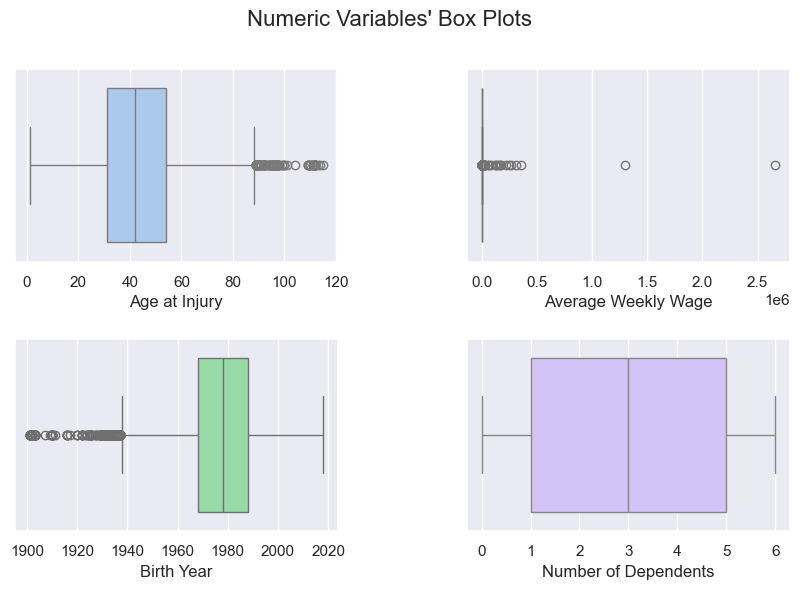

In [ ]:
filters_manual1 = (
                (X_train["Age at Injury"] <= 100)
                &
                (X_train["Average Weekly Wage"] <= 0.3*1e6)
                #&
                #(X_train["Birth Year"] >= 1950)                            
                #&
                #(X_train["Number of Dependents"])                        #There are no outliers here, so I think there is no manual restriction to make
)
X_train_out_man = X_train[filters_manual1]

In [ ]:
print('Percentage of data kept after removing outliers:', 100*(np.round(X_train_out_man.shape[0] / X_train.shape[0], decimals=5)))

In [ ]:
X_train_out = X_train[(filters_iqr_all | filters_manual1)]            #Only if the 2 filter says that the observation are outliers we remove!


print('Percentage of data kept after removing outliers:', 100*np.round(X_train_out.shape[0] / X_train.shape[0], 4))

---

<a class="anchor" id="feateng">

## 7. Feature Engineering
</a>

During our previous steps we have already created vairables such as:
- zip_code_cat 


In [ ]:
# # Dropping the varaibles Age at Injury after creating the Age Categries 
# X_train = X_train.drop('Age at Injury', axis=1)
# X_val = X_val.drop('Age at Injury', axis=1)
# test_data = test_data.drop('Age at Injury', axis=1)

# metric_features.remove("Age at Injury")

* Creating new feature Days Between Accident_Assembly

In [ ]:
X_train["Days Between Accident_Assembly"] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days
negative_count = (X_train["Days Between Accident_Assembly"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_Assembly':", negative_count)

In [ ]:
X_val["Days Between Accident_Assembly"] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days
negative_count = (X_val["Days Between Accident_Assembly"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_Assembly' in validation set:", negative_count)


In [ ]:
test_data["Days Between Accident_Assembly"] = (test_data['Assembly Date'] - test_data['Accident Date']).dt.days

In [ ]:
metric_features.append("Days Between Accident_Assembly")
non_metric_features.remove("Assembly Date")
non_metric_features.remove("Accident Date")

* Creating new feature Days Between Accident_C2

In [ ]:
X_train["Days Between Accident_C2"] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days
negative_count = (X_train["Days Between Accident_C2"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_C2' in train set:", negative_count)

In [ ]:
X_val["Days Between Accident_C2"] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days
negative_count = (X_val["Days Between Accident_C2"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_C2' in validation set:", negative_count)

In [ ]:
test_data["Days Between Accident_C2"] = (test_data['C-2 Date'] - test_data['Accident Date']).dt.days

In [ ]:
metric_features.append("Days Between Accident_C2")
non_metric_features.remove("C-2 Date")

In [ ]:
variables_to_drop = ['C-2 Date', 'Accident Date','Assembly Date']
X_train = X_train.drop(variables_to_drop, axis = 1)
X_val = X_val.drop(variables_to_drop, axis = 1)
test_data = test_data.drop(variables_to_drop, axis = 1)

In [ ]:
metric_features

In [ ]:
non_metric_features

In [ ]:
X_train.columns

##### Finding negative values in Metric columns and fixing them

In [ ]:
print("X_train with values in [Days Between Accident_Assembly] that are negative: " + str(len(X_train[ X_train["Days Between Accident_Assembly"] < 0])) + ".")
print("X_val with values in [Days Between Accident_Assembly] that are negative: " + str(len(X_val[ X_val["Days Between Accident_Assembly"] < 0])) + ".")

In [ ]:
print("X_train with values in [Days Between Accident_C2] that are negative: " + str(len(X_train[ X_train["Days Between Accident_C2"] < 0])) + ".")
print("X_val with values in [Days Between Accident_C2] that are negative: " + str(len(X_val[ X_val["Days Between Accident_C2"] < 0])) + ".")

In [ ]:
print("X_train with values in [Age at Injury] that are negative: " + str(len(X_train[ X_train["Age at Injury"] < 0])) + ".")
print("X_val with values in [Age at Injury] that are negative: " + str(len(X_val[ X_val["Age at Injury"] < 0])) + ".")

In [ ]:
# X_train[ X_train["Days Between Accident_Assembly"] < 0]["Days Between Accident_Assembly"] = 0
X_train["Days Between Accident_Assembly"] = X_train["Days Between Accident_Assembly"].clip(lower=0)
X_val["Days Between Accident_Assembly"] = X_val["Days Between Accident_Assembly"].clip(lower=0)
test_data["Days Between Accident_Assembly"] = test_data["Days Between Accident_Assembly"].clip(lower=0)

In [ ]:
X_train["Days Between Accident_C2"] = X_train["Days Between Accident_C2"].clip(lower=0)
X_val["Days Between Accident_C2"] = X_val["Days Between Accident_C2"].clip(lower=0)
test_data["Days Between Accident_C2"] = test_data["Days Between Accident_C2"].clip(lower=0)

<a class="anchor" id="transform">

## 8. Data Transformation - Encoding and Scaling 
</a>

In [ ]:
fig = plt.figure(figsize=(10, 8))

# Use spearman correlation 
corr = X_train[metric_features].corr(method="spearman").round(3)

# Plot heatmap
sns.heatmap(data=corr, annot=True, 
            # fmt='s',
            vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

<a class="anchor" id="encode">

### 8.1 Feature Encoding
</a>

Label Encoder for target variable (training and validation):

In [ ]:
#Initiate Label encoder
label_encoder = LabelEncoder()

# Fit the encoder on the training target variable
Y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the training and validation target variable
Y_val_encoded = label_encoder.transform(y_val)

# Convert the results back to DataFrames
Y_train_encoded_df = pd.DataFrame(Y_train_encoded, columns=['encoded_target'])
Y_val_encoded_df = pd.DataFrame(Y_val_encoded, columns=['encoded_target'])

One hot encoder for dependent variables (non-metric): (only for training and validation)

In [ ]:
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
test_data_copy = test_data.copy()

In [ ]:
X_val.columns

In [ ]:
X_train.columns

In [ ]:
# Initialize the encoder with the chosen settings
ohc = OneHotEncoder(sparse_output=False, drop="first")

# Fit the encoder on the training set only
ohc.fit(X_train_copy[non_metric_features])  

# Transform the training set
ohc_train_features = ohc.transform(X_train_copy[non_metric_features])
ohc_train_df = pd.DataFrame(ohc_train_features, index=X_train_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the training set
X_train_encoded = pd.concat([X_train_copy.drop(columns=non_metric_features), ohc_train_df], axis=1)

# Transform the validation set using the same encoder (do not fit again)
ohc_val_features = ohc.transform(X_val_copy[non_metric_features])
ohc_val_df = pd.DataFrame(ohc_val_features, index= X_val_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the validation set
X_val_encoded = pd.concat([X_val_copy.drop(columns=non_metric_features), ohc_val_df], axis=1)

# Transform the test set using the same encoder (do not fit again)
ohc_test_features = ohc.transform(test_data_copy[non_metric_features])
ohc_test_df = pd.DataFrame(ohc_test_features, index= test_data_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the test set
test_data_encoded = pd.concat([test_data_copy.drop(columns=non_metric_features), ohc_test_df], axis=1)

In [ ]:
# problem_column_name = non_metric_features[4]
# problem_column_name

In [ ]:
X_train.columns.values

In [ ]:
X_val.columns.values

<a class="anchor" id="minmax">

### 8.2 Min-max Scaler
</a>

Min-max scaler for dependent variables (metric):

In [ ]:
X_train[metric_features].head(10)

In [ ]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler on the training set and transform the training features
scaled_feat = scaler.fit_transform(X_train_copy[metric_features])

# Convert the scaled features back to a DataFrame 
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=X_train_copy.index)

# Concatenate the scaled features back to the original DataFrames
X_train_min_max_scaled = pd.concat([X_train_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
X_train_min_max_scaled_encoded = pd.concat([X_train_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)

# Transform the validation set using the same scaler (do not fit again)
scaled_feat = scaler.transform(X_val_copy[metric_features])

# Convert the scaled features back to a DataFrame 
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=X_val_copy.index)

# Concatenate the scaled features back to the original DataFrames
X_val_min_max_scaled = pd.concat([X_val_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
X_val_min_max_scaled_encoded = pd.concat([X_val_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)

# Transform the test set using the same scaler (do not fit again)
scaled_feat = scaler.transform(test_data_copy[metric_features])

# Convert the scaled features back to a DataFrame 
scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=test_data_copy.index)

# Concatenate the scaled features back to the original DataFrames
test_min_max_scaled = pd.concat([test_data_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
test_min_max_scaled_encoded = pd.concat([test_data_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)


In [ ]:
X_train_min_max_scaled[metric_features].describe().round(2).T

In [ ]:
X_val_min_max_scaled[metric_features].describe().round(2).T
# Days between accident assembly & days between accident C2 have min values != from zero!! 

In [ ]:
test_min_max_scaled[metric_features].describe().round(2).T
# avg weekly wage max value very different from 1. 

<a class="anchor" id="std">

### 8.3 Standard Scaler
</a>

Standard scaler for dependent variables (metric):

In [ ]:
# Step 1: Create a StandardScaler instance
standard_scaler = StandardScaler()

# Step 2: Fit the scaler on the training set and transform the training features
standard_scaled_feat = standard_scaler.fit_transform(X_train_copy[metric_features])

# Step 3: Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=X_train_copy.index)

# Optionally, you can concatenate the scaled features back to the original DataFrames
X_train_std_scaler = pd.concat([X_train_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
X_train_std_scaler_encoded = pd.concat([X_train_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

# Transform the validation set using the same scaler (do not fit again)
standard_scaled_feat = standard_scaler.transform(X_val_copy[metric_features])

# Step 3: Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=X_val_copy.index)

# Optionally, you can concatenate the scaled features back to the original DataFrames
X_val_std_scaler = pd.concat([X_val_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
X_val_std_scaler_encoded = pd.concat([X_val_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

# Transform the validation set using the same scaler (do not fit again)
standard_scaled_feat = standard_scaler.transform(test_data_copy[metric_features])

# Step 3: Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=test_data_copy.index)

# Optionally, you can concatenate the scaled features back to the original DataFrames
test_std_scaler = pd.concat([X_val_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
# X_val_std_scaler = pd.concat([X_val_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
X_test_std_scaler_encoded = pd.concat([test_data_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

In [ ]:
X_train_std_scaler[metric_features].describe().round(2).T

In [ ]:
X_val_std_scaler[metric_features].describe().round(2).T
# avg weekly wage std dev very different from 1.

In [ ]:
X_val_std_scaler[metric_features].describe().round(2).T
# avg weekly wage std dev very different from 1.

---

<a class="anchor" id="featselect">

## 9. Feature Selection
</a>

<a class="anchor" id="filter">

### 9.1 Filter Methods
</a>

<a class="anchor" id="uni">

### 9.1.1 Univariate Variables
</a>

In [ ]:
X_val_std_scaler[metric_features].var()

Since neither of the variables are univariate (variance=0), we will not dicard any of the variables based on this method.

<a class="anchor" id="chi">

### 9.1.2 Chi-Square
</a>

In [ ]:
#Define the categorical and numerical variables of the X_train dataset into 2 new variables
num_features=X_train[metric_features]
cat_features=X_train[non_metric_features]

- Define a function that will test whether a categorical independent variable (var) is an important predictor for the target using the Chi-Square test of independence.

    It prints whether the variable is important or not for prediction based on the Chi-Square test.
 

In [ ]:
def TestIndependence(X,y,var,alpha=0.05):

    #Create a contingency table to observe the relationship between the target variable y and the feature X 
    dfObserved = pd.crosstab(y,X) 

    #Perform the Chi-Square test of independence on the contingency table
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)

    #Create a DataFrame for the expected values from the Chi-Square test
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)

    #Check if the p-value is smaller than the alpha level
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result, p)

In [ ]:
#Run the function throughout the categorical variables
for var in cat_features:
    TestIndependence(cat_features[var],y_train, var)

<a class="anchor" id="wrapper">

### 9.2 Wrapper Methods
</a>

<a class="anchor" id="rfe">

#### 9.2.1 RFE
</a>

In [ ]:
model1 = LogisticRegression()

In [ ]:
rfe = RFE(estimator=model1, n_features_to_select=3)     #Try another values and see their scores
rfe

In [ ]:
X_train_std_scaler_num = X_train_std_scaler[metric_features]
X_val_std_scaler_num = X_val_std_scaler[metric_features]

X_train_std_scaler_num.head()

In [ ]:
X_rfe = rfe.fit_transform(X_train_std_scaler_num, y_train)

In [ ]:
rfe.support_

In [ ]:
rfe.ranking_

In [ ]:
selected_features = pd.Series(rfe.support_, index = X_train_std_scaler_num.columns)         #If it says True we should keep that feature
selected_features

Now let's see the optimum value for the number of features selected, to get the higher score

In [ ]:
#Nº of features
nof_list=np.arange(1,6)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train_std_scaler_num,y_train)
    X_val_rfe = rfe.transform(X_val_std_scaler_num)
    
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Let's try the Recursive feature elimination with cross-validation method:

In [ ]:
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfe_cv = RFECV(estimator=model, step=2, cv=6, scoring='accuracy')
rfe_cv.fit(X_train_std_scaler_num, y_train)

print("Optimal number of features:", rfe_cv.n_features_)
print("Best cross-validated score:", rfe_cv.score(X_val_std_scaler_num, y_val))

In [ ]:
plt.plot(list(range(1,6)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,6)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

Using another classifier, to analyse the score

In [ ]:
#no of features
nof_list=np.arange(1,6)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    #call support vector machines classifier
    model = RandomForestClassifier(random_state=27)
    
    #create RFE instance
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train_std_scaler_num,y_train)
    X_val_rfe = rfe.transform(X_val_std_scaler_num)
    
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score > high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train_std_scaler_num.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

In [ ]:
plt.plot(list(range(1,6)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,6)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

<a class="anchor" id="embedded">

### 9.3 Embedded Methods
</a>

<a class="anchor" id="lasso">

#### 9.3.1 Lasso Regression
</a>

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,6))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
reg = LassoCV(eps=0.01)      #Depending of the strength of the eps, we can get rid of some variables, TRY 0.1

In [ ]:
reg.fit(X_train_std_scaler_num, Y_train_encoded)

In [ ]:
coef = pd.Series(reg.coef_, index=X_train_std_scaler_num.columns)
coef

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
coef.sort_values()

In [ ]:
plot_importance(coef,'Lasso')

<a class="anchor" id="select">

### 9.4 Select K Best Method
</a>

In [ ]:
# Initialize SelectKBest with f_regression as the scoring function
selector = SelectKBest(score_func=f_regression, k=5)        #Adjust the value of k

In [ ]:
selector.fit(X_train_std_scaler_num, Y_train_encoded)

In [ ]:
scores = pd.Series(selector.scores_, index=X_train_std_scaler_num.columns)

In [ ]:
def plot_importance_kbest(scores, name):
    plt.figure(figsize=(8, 6))
    scores.plot(kind="barh")
    plt.title("Feature importance using " + name + " Method")
    plt.show()

In [ ]:
plot_importance_kbest(scores, 'SelectKBest')

<hr>

### Numerical Data

| Predictor                    | Spearman | RFE LR | RFE RandForest | Lasso  | SelectKBest | What to do? (One possible way to "solve") |
|------------------------------|----------|--------|----------------|--------|-------------|------------------------------------------|
| Age at Injury                | Keep     | Keep   | Keep           | Keep   | Keep     | Include in the model                     |
| Average Weekly Wage          | Keep     | Keep   | Keep           | Keep   | Keep     | Include in the model                     |
| Number of Dependents         | Discard  | Keep   | Keep           | Discard| Discard     | Include in the model                     |
| Days Between Accident_Assembly | Either this or Accident_C2      | Keep   | Keep           | Discard| Discard        | Include in the model                     |
| Days Between Accident_C2     | Either this or Accident_Assembly        | Keep   | Keep           | Discard| Discard        | Include in the model                     |


Industry Code is IMPORTANT for Prediction
WCIO Cause of Injury Code is IMPORTANT for Prediction
WCIO Nature of Injury Code is IMPORTANT for Prediction
WCIO Part Of Body Code is IMPORTANT for Prediction
Alternative Dispute Resolution is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
Carrier Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Industry Code Description is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
zip_code_cat is IMPORTANT for Prediction
First Hearing Date Binary is IMPORTANT for Prediction


<hr>

### Categorical Data

| Predictor                      | Chi-Square | 
|--------------------------------|------------|
| Industry Code                  | Keep       |                 
| WCIO Cause of Injury Code      | Keep       |
| WCIO Nature of Injury Code     | Keep       | 
| WCIO Part Of Body Code         | Keep       | 
| Alternative Dispute Resolution | Keep       |
| Attorney/Representative        | Keep       |
| Carrier Type                   | Keep       |
| County of Injury               | Keep       |
| COVID-19 Indicator             | Keep       |
| District Name                  | Keep       |
| Gender                         | Keep       | 
| Industry Code Description      | Keep       |
| Medical Fee Region             | Keep       | 
| zip_code_cat is IMPORTANT      | Keep       |
| First Hearing Date Binar       | Keep       | 

----

<a class="anchor" id="dropfeat">

### 9.5 Drop Features according to Feature Selections
</a>

In [ ]:
X_train_std_scaler_encoded.drop(columns=["Number of Dependents", "Days Between Accident_Assembly"], inplace=True)
X_val_std_scaler_encoded.drop(columns=["Number of Dependents", "Days Between Accident_Assembly"], inplace=True)
X_test_std_scaler_encoded.drop(columns=["Number of Dependents", "Days Between Accident_Assembly"], inplace=True)
# "Age at Injury", "Average Weekly Wage",  "Days Between Accident_C2"

<a class="anchor" id="model">

## 10. Model
</a>

Type of Problem <br/>
The type of problem to be solved is a multiclassification problem where the output is between 8 different choices. We will use a simple Logistical Regression model set to be able to compute multiple classes.<br/>
<br/>
Metric used:<br/>
As a classification problem, we observed the following metrics to determine the effectiveness of our model:
 - accuracy
 - precision
 - recall
 - f1 score

 Each point is measured in a different and observing them all allows us to get an accurate view of our model's results.

In [ ]:
###
# A helper method to help determine the average score of a model when split with a certain
# number of folds. This will return a printed message describing the average scores after the 
# split (even though the split was already done within the preprocessing steps.)
# 
# parameters:
#   method: a type of kfold method passed in to split on - can be only either KFold or KFoldRepeated
#   X: the independent variables preprocessed to be validated on
#   Y: the dependent variable to predict based on the X
###
def avg_score_LR(method,X,y):
    score_train = []
    score_test = []
    for train_index, test_index in method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = model = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_train, y_train)
        value_train = model.score(X_train, y_train)
        value_test = model.score(X_test,y_test)
        score_train.append(value_train)
        score_test.append(value_test)

    print('Train:', np.mean(score_train))
    print('Test:', np.mean(score_test))

In [ ]:
###
# A helper method to help determine the average score of a model when split with a certain
# number of folds. This will return a printed message describing the average scores after the 
# split (even though the split was already done within the preprocessing steps.)
# 
# parameters:
#   method: a type of kfold method passed in to split on - can be only StratifiedKFold
#   X: the independent variables preprocessed to be validated on
#   Y: the dependent variable to predict based on the X
###

def avg_score_Stratified(method,X,y):
    score_train = []
    score_test = []
    for fold, (train_index, test_index) in enumerate(method.split(X,y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = model = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_train, y_train)
        value_train = model.score(X_train, y_train)
        value_test = model.score(X_test,y_test)
        score_train.append(value_train)
        score_test.append(value_test)

    print('Train:', np.mean(score_train))
    print('Test:', np.mean(score_test))

In [ ]:
# Testing KFold with 10 splits on the standard encoded training data to see the average score
kf = KFold(n_splits=10)
print("--- Training Set ---")
avg_score_LR(kf, X_train_std_scaler_encoded, Y_train_encoded_df)

In [ ]:
# Testing KFoldRepeated with 2 iterations of 6 splits on the standard encoded training data to see the average score
rkf = RepeatedKFold(n_splits=6, n_repeats=2)
print("--- Training Set ---")
avg_score_LR(rkf, X_train_std_scaler_encoded, Y_train_encoded_df)

In [ ]:
# Testing StratifiedKFold with 10 splits on the standard encoded training data to see the average score
skf = StratifiedKFold(n_splits=10)
print("--- Training Set ---")
avg_score_Stratified(skf, X_train_std_scaler_encoded, Y_train_encoded_df)

In [ ]:
# Testing KFold with 10 splits on the minmax encoded training data to see the average score
kf = KFold(n_splits=10)
print("--- Training Set ---")
avg_score_LR(kf, X_train_min_max_scaled_encoded, Y_train_encoded_df)

There doesn't seem to be much difference between the different Cross Validation methods. KFold seems to have the best Test score on the Training set to Validation sets by .01 points.

In [ ]:
# multinomial: calculate the coefficients for each class seperately and determine the probability of each
# lbfgs: good for large datasets, helps find the minimum of the loss function
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to the standard scaled and encoded training sets
model.fit(X_train_std_scaler_encoded, Y_train_encoded)

In [ ]:
# score the training and valaidation sets seperately
score_train = model.score(X_train_std_scaler_encoded, Y_train_encoded_df)
score_test = model.score(X_val_std_scaler_encoded, Y_val_encoded_df)

In [ ]:
score_train

In [ ]:
score_test

In [ ]:
# make a prediction on the validation set
y_pred = model.predict(X_val_std_scaler_encoded)

In [ ]:
# print the confusion matrix
confusion_matrix(Y_val_encoded, y_pred)

In [ ]:
# print the accuracy score
accuracy_score(Y_val_encoded, y_pred)

In [ ]:
# determine the precision scores for each class
precision_per_class = precision_score(Y_val_encoded, y_pred, average=None)

# print the score and the name of the value assoiciated with the encoded version of each score
for x,y in zip(precision_per_class, np.unique(y_val)):
    print("["+str(y)+"]:     \t" + str(round(x,2)))

precision_weighted = precision_score(Y_val_encoded, y_pred, average='macro')
print("\nMacro precision: " + str(round(precision_weighted, 3)))

In [ ]:
# determine the recall scores for each class
recall_per_class = recall_score(Y_val_encoded, y_pred, average=None)

# print the score and the name of the value assoiciated with the encoded version of each score
for x,y in zip(recall_per_class, np.unique(y_val)):
    print("["+str(y)+"]:     \t" + str(round(x,2)))

recall_per_class = recall_score(Y_val_encoded, y_pred, average='macro')
print("\nMacro recall: " + str(round(recall_per_class, 3)))

In [ ]:
# determine the f1 scores
f1_per_class = f1_score(Y_val_encoded, y_pred, average=None)

# print the score and the name of the value assoiciated with the encoded version of each score
for x,y in zip(f1_per_class, np.unique(y_val)):
    print("["+str(y)+"]:     \t" + str(round(x,2)))

# print the f1 macro score
f1_per_class = f1_score(Y_val_encoded, y_pred, average='macro')
print("\nMacro f1: " + str(round(f1_per_class, 3)))

In [ ]:
# ovr: (one vs rest) - one classifier per class. For each classifier, the class is fitted against all the other classes. (sklearn)
model_ovr = LogisticRegression(multi_class='ovr')
# fit the model to the standard scaled and encoded training sets
model_ovr.fit(X_train_std_scaler_encoded, Y_train_encoded)

In [ ]:
# score the training and valaidation sets seperately
score_train_ovr = model_ovr.score(X_train_std_scaler_encoded, Y_train_encoded_df)
score_test_ovr = model_ovr.score(X_val_std_scaler_encoded, Y_val_encoded_df)

In [ ]:
score_train_ovr

In [ ]:
score_test_ovr

In [ ]:
y_pred_ovr = model_ovr.predict(X_val_std_scaler_encoded)

In [ ]:
# determine the accuracy score
accuracy_score(Y_val_encoded, y_pred_ovr)

In [ ]:
# determine the f1 scores for each class
f1_per_class = f1_score(Y_val_encoded, y_pred_ovr, average=None)

# print the score and the name of the value assoiciated with the encoded version of each score
for x,y in zip(f1_per_class, np.unique(y_val)):
    print("["+str(y)+"]:     \t" + str(round(x,2)))

# print the f1 macro score
f1_per_class = f1_score(Y_val_encoded, y_pred_ovr, average='macro')
print("\nMacro f1: " + str(round(f1_per_class, 3)))

<a class="anchor" id="kaggle">

## 11. Kaggle Submission
</a>

In [ ]:
# get the model prediction
y_pred_test = model.predict(X_test_std_scaler_encoded)

In [ ]:
y_pred_test

In [ ]:
# decode the prediction labels back to their original values
decoded_labels = label_encoder.inverse_transform(y_pred_test)
decoded_labels

In [ ]:
test_data.shape

In [ ]:
# combine the prediction values with their claim identifiers into a dataframe
kaggle_submission = pd.DataFrame({"Claim Identifier": test_data.index, "Claim Injury Type":decoded_labels})
kaggle_submission.head()

In [ ]:
# Compile the resulting dataframe into a csv file named "Kaggle_submission.csv"
# this will be found in the directory the file is currently running from
# if a file exists with the same name, it will overwrite it with the new output.
kaggle_submission.to_csv("Kaggle_Submission.csv", index=False)